# Connor Bell Captstone Task II

## Part I. Research Question

### A. Research Question

For my analysis, I wanted to examine the relationship that certain variables have on a house's price. Our research question that we will be using is "To what extent do Number of Bedrooms, Bathrooms, Square Footage, and Lot Size affect Housing Prices in New York?" Now, we are going to be using a Multiple Linear Regression model to evaluate this question, so our variable choices all need to be quantitative variables, which they are. I am choosing to only include houses in New York to try and limit the amount of external factors that could have outside influence on our model. Keeping all of our values from the same relative location allows us to, ideally, ignore the other nuances in real estate that location naturally brings.

This question serves many purposes. Analyzing housing prices in New York offers important insights for various stakeholders in the real estate sector. Understanding the key factors influencing housing prices not only aids buyers, sellers, and investors in making informed decisions but also assists policymakers and urban planners in crafting effective housing policies. This analysis can identify trends, such as the impact of square footage, location, amenities, and show the combined impact that these variables have on explaining the observed variance that we see in house prices. This information allows those involved in the real estate market to optimize pricing strategies, predict market trends, and tailor their approach to investing, allowing for better-informed decisions. Also, by determining if we can use our variables to better explain the observed variances in our housing prices, we can gain a more comprehensive understanding of the factors that shape the real estate market in New York, ultimately creating a more efficient and responsive housing marketplace.

Our hypothesis is that the model will demonstrate that our variables do in fact have a statistically significant impact on house prices. The model will further demonstrate this by explaining the observed variance we see in our data. Because of this Our Null and Alternative Hypotheses are as follows:

<b>Null hypothesis</b> - Number of Bedrooms, Bathrooms, Square Footage, and Lot Size do not have a statistically significant effect on Housing Prices in New York.							     
<b>Alternate Hypothesis</b> – Number of Bedrooms, Bathrooms, Square Footage, and Lot Size have a statistically significant effect on Housing Prices in New York.

## Part II. Data Collection

### B. Data Collection Process

My data collection process was fairly simple. I knew that I wanted to do something related to real estate. In debating my data collection options, I decided to first check Kaggle, a site that holds thousands of datasets free for public use. A quick search for real estate data revealed the dataset that I ultimately chose to use. It was a rather simple process, and using a publicly available dataset has the largest benefit of being extremely easy to access. It was as simple as downloading the data as a CSV file and I was good to go. The one downside to using a premade dataset, however, is that we  don't have any control over the content of the data, including variables. This dataset has 10 variables, and 4 of them aren't of much use to us in this analysis. So we are left with only a handful of variables for us to use. If we had collected the data ourselves, we could have had more control over what data we collected, including variables we would ideally like to test. But since this is a premade dataset, we are stuck with what we have.

## Part III. Data Extraction and Preparation

### C. Data Extraction and Preparation Process

Our dataset has 1.4 million values. For the state of New York alone, there are ~680,000 values. For simplicity sake, we are going to narrow that down to 10,000 values, just to keep things simpler and not having to worry about the data taking a long time to load in. Below will be our steps to clean our data and narrow it down to our 10,000 value figure.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Desktop/WGU/capstone/realtor-data.csv')

In [3]:
data

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


As we can see, we have over 1.4 million values. To start, we will filter out all of our values that are not in New York

In [4]:
data_NY = data[data['state'] == 'New York']
data_NY

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,NaN,175000.0
54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,2021-11-24,425000.0
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,NaN,419000.0
54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,NaN,365000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


Now that we have only New York values, we will go ahead and get rid of any values where we have a NaN value in any of our variables that we are going to be using in our analysis, which include: bed, bath, acre_lot, and house_size, and price. We will also throw in variables like city and zip_code, because that might be a useful piece of information we can use later.

In [5]:
cols_to_check = ['bed', 'bath', 'acre_lot', 'house_size', 'price','city','zip_code']

data_NN = data_NY.dropna(subset=cols_to_check)
data_NN

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,NaN,175000.0
54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,2021-11-24,425000.0
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,NaN,419000.0
54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,NaN,365000.0
...,...,...,...,...,...,...,...,...,...,...
1401060,for_sale,3.0,1.0,0.10,Dunkirk,New York,14048.0,1002.0,2017-04-03,29900.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


We also need to check for any duplicate values, and drop those

In [6]:
print(data_NN.duplicated().value_counts())

True     269889
False     28568
Name: count, dtype: int64


It appears that almost 270,000 of our 300,000ish values are duplicates, which feels impossibly high. However, since we only want 10,000 values in the end, we will go ahead and remove all those duplicated rows.

In [7]:
data_NN = data_NN.drop_duplicates()
data_NN

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,NaN,175000.0
54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,2021-11-24,425000.0
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,NaN,419000.0
54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,NaN,365000.0
...,...,...,...,...,...,...,...,...,...,...
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401048,for_sale,1.0,1.0,0.25,Forestville,New York,14062.0,696.0,NaN,139000.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0
1401059,for_sale,5.0,2.0,0.55,Brocton,New York,14716.0,4260.0,NaN,95000.0


Before we move on, our zip_code variable is saved as a float, which zip codes are obviously not. We will convert them to strings to ensure we don't run into any issues with that.

In [8]:
data_NN['zip_code'] = data_NN['zip_code'].astype(str)

In [9]:
data_NN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28568 entries, 30149 to 1401063
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          28568 non-null  object 
 1   bed             28568 non-null  float64
 2   bath            28568 non-null  float64
 3   acre_lot        28568 non-null  float64
 4   city            28568 non-null  object 
 5   state           28568 non-null  object 
 6   zip_code        28568 non-null  object 
 7   house_size      28568 non-null  float64
 8   prev_sold_date  17702 non-null  object 
 9   price           28568 non-null  float64
dtypes: float64(5), object(5)
memory usage: 2.4+ MB


Alright, before we actually select our 10,000 values, we are going to first check for outliers. This may seem a little backwards, but I want to avoid grabbing values that have outliers because they will skew the data. We do want a healthy range, but if there are some outrageous outliers, then we want to get rid of those.

In [10]:
quant_var = 'bed','bath','acre_lot','house_size','price'
quant_var

('bed', 'bath', 'acre_lot', 'house_size', 'price')

In [11]:
outlier_list = []

for q in quant_var:
    q3 = data_NN[q].describe().loc["75%"]
    q1 = data_NN[q].describe().loc["25%"]
    iqr = q3-q1
    
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    low_outliers = len(data_NN.loc[data_NN[q] < lower])
    up_outliers = len(data_NN.loc[data_NN[q] > upper])
    
    outliers = low_outliers + up_outliers
    
    outlier_list.append(f"{q}: # of outliers: {outliers}")
    
outlier_string = '\n'.join(outlier_list)

In [12]:
print(outlier_string)

bed: # of outliers: 4278
bath: # of outliers: 2482
acre_lot: # of outliers: 4023
house_size: # of outliers: 1842
price: # of outliers: 2533


As we can see, there are a lot of outliers. Now, we still have 28,000 values left to choose from. So we are going to drop all of our values that have an outlier value in one of their variables and see if we still have at least 10,000 values left for our analysis. Note that we don't want to impute our outliers with the median value, because don't want to mess with a house's data. We want to keep it as pure as possible.

In [13]:
for q in quant_var:
    q3 = data_NN[q].describe().loc["75%"]
    q1 = data_NN[q].describe().loc["25%"]
    iqr = q3 - q1
    
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)

    data_NN = data_NN.loc[(data_NN[q] >= lower) & (data_NN[q] <= upper)]

In [14]:
data_NN

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
54278,for_sale,3.0,2.0,1.20,Millerton,New York,12546.0,1350.0,2018-08-31,375000.0
54528,for_sale,4.0,3.0,1.29,Nassau,New York,12123.0,2274.0,NaN,194900.0
54530,for_sale,2.0,1.0,0.20,Nassau,New York,12123.0,690.0,2005-12-01,40000.0
54531,for_sale,3.0,2.0,1.00,Hoosick Falls,New York,12090.0,980.0,NaN,125000.0
...,...,...,...,...,...,...,...,...,...,...
1400861,for_sale,3.0,2.0,0.21,Lackawanna,New York,14218.0,1351.0,2019-11-04,174900.0
1400875,for_sale,2.0,2.0,0.36,Hamburg,New York,14085.0,1300.0,2011-08-26,280000.0
1400962,for_sale,4.0,1.0,0.34,Belmont,New York,14813.0,1524.0,2008-07-16,39000.0
1400975,for_sale,4.0,2.0,0.50,Friendship,New York,14739.0,1822.0,2014-12-26,147500.0


After removing our outlier values, we still have over 18,000 values to choose from, which will work. Now we will check and see if we have any outliers remaining that our filter process didn't take care of.

In [15]:
outlier_list = []

for q in quant_var:
    q3 = data_NN[q].describe().loc["75%"]
    q1 = data_NN[q].describe().loc["25%"]
    iqr = q3 - q1
    
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    low_outliers = len(data_NN.loc[data_NN[q] < lower])
    up_outliers = len(data_NN.loc[data_NN[q] > upper])
    
    outliers = low_outliers + up_outliers
    
    outlier_list.append(f"{q}: # of outliers: {outliers}")

outlier_string = '\n'.join(outlier_list)
print(outlier_string)

bed: # of outliers: 0
bath: # of outliers: 0
acre_lot: # of outliers: 1815
house_size: # of outliers: 206
price: # of outliers: 197


Alright, it does appear we have some outliers left. This is because when we removed those values completely, the calculation for IQR changes. So when we run the code to calculate outliers again, it changes the values being used to calculate IQR, so outliers remain, but they are different, smaller values. Here is where a decision has to be made. The more values I remove, and the smaller range I allow into our model, the better results our model will have, because it will be running on a small range of similar data (Also I tested this by trying several different ways to remove outliers. The more I removed, the better performance was). Now, we are focused on model performance, but we do want to keep the ability to apply this model to outside data, so the more we make it tuned for this specific dataset, the less applicable the results will be to outside data.

In light of this, I am going to leave them. Given the criteria used to filter out the outliers, we have gotten rid of our massive values which would have had a rather aggressive impact on our analysis. Also within the housing market itself, there are naturally occurring outliers present. In every housing market in the country, you are likely to find massive homes compared to the average house. We do want to be able to account for some of those, so we will only treat these values for outliers just once, and not multiple times. Note that we haven't selected our final 10,000 homes to conduct the analysis on. When we do that, we will have a random number of these values with "outliers" present, which will help account for more observed randomness in our data.

Now that we have all the values that will work for our analysis, we will go ahead and take a random sample of 10,000 of those values

In [16]:
df = data_NN.sample(n=10000, random_state=36)
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
1145356,for_sale,3.0,2.0,0.20,Colonie,New York,12205.0,1002.0,NaN,224900.0
1143678,for_sale,3.0,2.0,0.25,Cohoes,New York,12047.0,1608.0,NaN,259900.0
1106405,for_sale,4.0,3.0,0.46,Bohemia,New York,11716.0,2400.0,NaN,849000.0
452024,for_sale,2.0,1.0,0.08,Carmel,New York,10512.0,640.0,2020-03-05,220000.0
740285,for_sale,3.0,3.0,0.05,Floral Park,New York,11001.0,1437.0,2002-04-01,695555.0
...,...,...,...,...,...,...,...,...,...,...
897110,for_sale,4.0,3.0,0.09,New Hyde Park,New York,11040.0,1731.0,2018-07-24,989000.0
1312574,for_sale,4.0,2.0,0.03,Syracuse,New York,13206.0,1446.0,NaN,129900.0
501772,for_sale,3.0,4.0,0.07,Staten Island,New York,10314.0,1682.0,NaN,810000.0
1316487,for_sale,4.0,2.0,0.51,Binghamton,New York,13901.0,1552.0,NaN,139900.0


And to make it look more presentable, we will go ahead and reset their index numbers to range from 1-10000, not from their original value from the original data

In [17]:
dfey = df.reset_index(drop=True)
df.index = dfey.index + 1

In [18]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
1,for_sale,3.0,2.0,0.20,Colonie,New York,12205.0,1002.0,NaN,224900.0
2,for_sale,3.0,2.0,0.25,Cohoes,New York,12047.0,1608.0,NaN,259900.0
3,for_sale,4.0,3.0,0.46,Bohemia,New York,11716.0,2400.0,NaN,849000.0
4,for_sale,2.0,1.0,0.08,Carmel,New York,10512.0,640.0,2020-03-05,220000.0
5,for_sale,3.0,3.0,0.05,Floral Park,New York,11001.0,1437.0,2002-04-01,695555.0
...,...,...,...,...,...,...,...,...,...,...
9996,for_sale,4.0,3.0,0.09,New Hyde Park,New York,11040.0,1731.0,2018-07-24,989000.0
9997,for_sale,4.0,2.0,0.03,Syracuse,New York,13206.0,1446.0,NaN,129900.0
9998,for_sale,3.0,4.0,0.07,Staten Island,New York,10314.0,1682.0,NaN,810000.0
9999,for_sale,4.0,2.0,0.51,Binghamton,New York,13901.0,1552.0,NaN,139900.0


Now that we have narrowed down our 1.4 million values down to 10,000, we can discuss the advantages and disadvantages of our methods of narrowing down our data. There are two main advantages to our methods. Firstly, by narrowing down our data, we significantly reduced the number of rows to analyze, leading to improved processing efficiency, as working with a smaller dataset often requires less computational resources and speeds up data analysis and visualization tasks. The second benefit is by selectively removing data, we were able to filter out certain values that we didn't want to deal with, such as null values, which makes cleaning the data simpler for us.

The large disadvantage is the process of filtering and sampling data the way we did may result in the exclusion of certain patterns or outliers that could be crucial for a comprehensive understanding of our data. If there are important insights in the excluded data, our analysis might miss them.

Ultimately, we traded potential information loss for speed and efficiency. Given how large our initial dataset was, it's a fair trade to make.

Alright, and now that we have our cleaned data formatted how we like it, we will go ahead and check for duplicate values (again just to make sure) and outliers

In [19]:
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          10000 non-null  object 
 1   bed             10000 non-null  float64
 2   bath            10000 non-null  float64
 3   acre_lot        10000 non-null  float64
 4   city            10000 non-null  object 
 5   state           10000 non-null  object 
 6   zip_code        10000 non-null  object 
 7   house_size      10000 non-null  float64
 8   prev_sold_date  6486 non-null   object 
 9   price           10000 non-null  float64
dtypes: float64(5), object(5)
memory usage: 781.4+ KB


We have some missing values in our prev_sold_date variable. We are not interested in that in the slightest for this analysis, so we will just go ahead and leave that be.

All of that being sorted, we will now check how many outliers made it in to our values.

In [21]:
outlier_list = []

for q in quant_var:
    q3 = df[q].describe().loc["75%"]
    q1 = df[q].describe().loc["25%"]
    iqr = q3-q1
    
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    low_outliers = len(df.loc[df[q] < lower])
    up_outliers = len(df.loc[df[q] > upper])
    
    outliers = low_outliers + up_outliers
    
    outlier_list.append(f"{q}: # of outliers: {outliers}")
    
outlier_string = '\n'.join(outlier_list)

In [22]:
print(outlier_string)

bed: # of outliers: 0
bath: # of outliers: 0
acre_lot: # of outliers: 948
house_size: # of outliers: 105
price: # of outliers: 106


Alright, a good amount of outliers made it in. We are going to check the range of those outliers, just to make sure that we are okay with their range outside of our IQR. As we stated above, we want a little bit of variation of the data to be able to represent the houses that are bigger or smaller than average, but nothing too far out there.

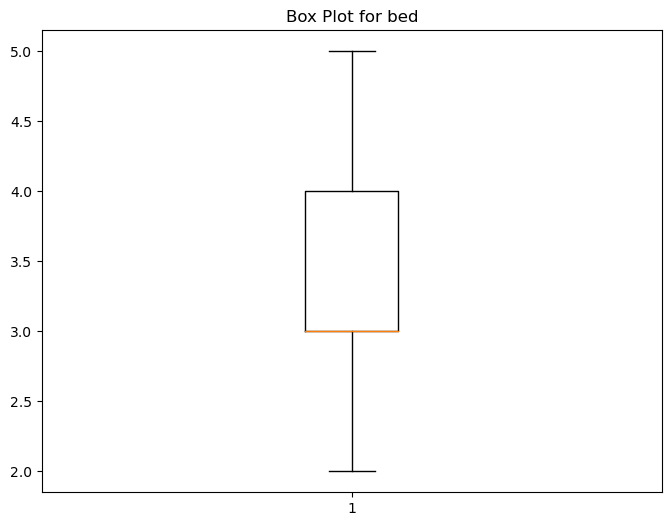

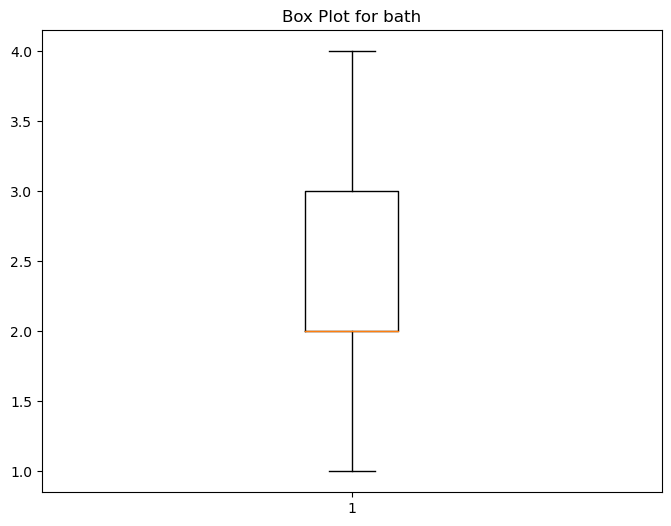

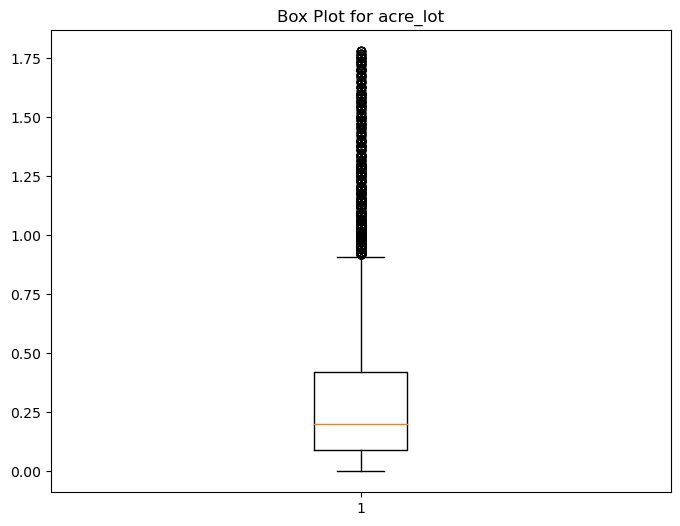

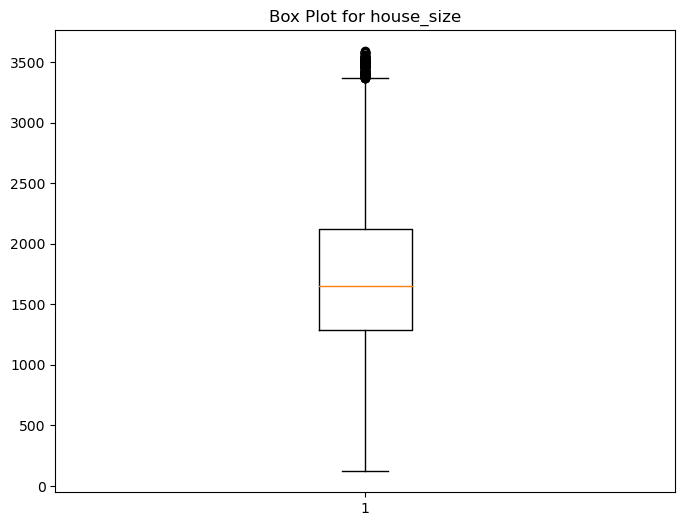

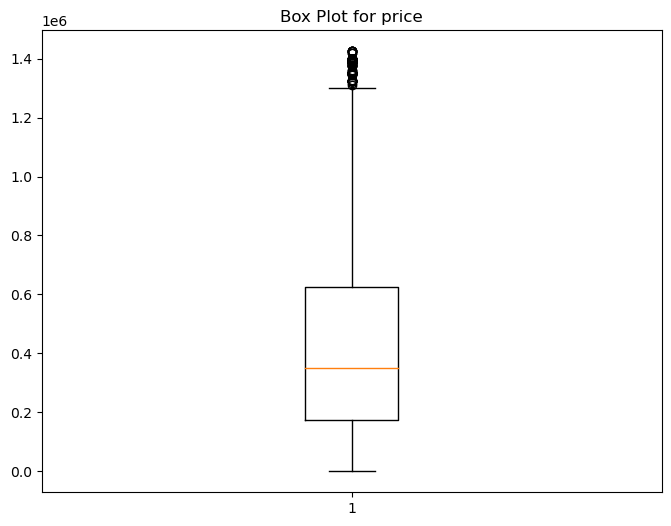

In [23]:
for variable in quant_var:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[variable])
    plt.title(f'Box Plot for {variable}')
    plt.show()

Alright, all of our outliers appear to be within a reasonable range. Obviously, the outliers for acre_lot seem to be fairly above our limit. However, considering the relatively small scale of acre_lot and the practical reality that housing lots vary widely, especially in a state like New York with a large mix of urban and rural areas, we are going to accept those outliers and leave everything as is.

Now that our data has been filtered down, checked for things like null values and duplicates, and appropriately treated for outliers for our analysis, we are ready to begin the analysis and building of the model.

## Part IV. Analysis

### D. Analysis Process

Now that we are ready to build our model, we will break down the steps of our model.

<b>1. Feature Selection:</b> Identify the independent variables (features) that are relevant for predicting the target variable.

<b>2. Train-Test Split:</b> Split the dataset into training and testing sets to assess the model's generalization to new data.

<b>3. Model Building:</b> Use the training set to fit the MLR model, estimating the coefficients for each independent variable.

<b>4. Model Evaluation:</b> Evaluate the model's performance on the testing set, using metrics like Mean Squared Error (MSE) or R-squared.

<b>5. Model Interpretation:</b> Interpret the coefficients of the model to understand the relationship between independent variables and the target variable.

<b>6. Model Fine-Tuning:</b> Adjust the model, if necessary, based on insights from evaluation or other considerations.

<b>7. Prediction:</b> Use the trained model to make predictions on new or unseen data.

<b>8. Evaluation:</b> Evaluate and interpret our model's effectiveness.

<b>Feature Selection</b> is simple for us. We have 5 total variables we are going to be using for our model. Our target variable will be price, and our predictor variables will be bed, bath, acre_lot, and house_size. They are all continuous, quantitative variables.

Splitting our data into <b>Training and Testing Datasets</b> allows for model training on one subset and evaluation on another, providing an unbiased assessment of the model's performance on unseen data. This helps detect overfitting and ensures the model's ability to be applied to real-world data.

We will be splitting our model into an 80/20 split, which is common practice.

In [24]:
X = df[['bed','bath','acre_lot','house_size']]
y = df['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

To verify it works, the train datasets should have 8000 values and the test should have 2000

In [26]:
X_train.shape

(8000, 4)

In [27]:
X_test.shape

(2000, 4)

Now our data is split how we want it, we can begin building our initial model.

We start our <b>Model Build</b> by running it on our train dataset. We will be using the Linear Regression module from statsmodels library to build the model for us, using Ordinary Least Squares, or OLS.

In [28]:
X_train_with_intercept = sm.add_constant(X_train)

stats_model = sm.OLS(y_train, X_train_with_intercept).fit()

print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     646.9
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:17:52   Log-Likelihood:            -1.1148e+05
No. Observations:                8000   AIC:                         2.230e+05
Df Residuals:                    7995   BIC:                         2.230e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.494e+04   1.33e+04      4.136      0.0

Alright, we have built our initial model. We will go ahead and take a brief look at our initial results.

Constant (const):
Coefficient (coef): 54,940
Interpretation: The estimated intercept when all predictor variables are zero.
Significance: Significant (p-value < 0.05).

bed:
Coefficient (coef): -9,427.96
Interpretation: Holding other variables constant, an increase in the number of bedrooms is associated with a decrease in the price.
Significance: Significant (p-value = 0.035).

bath:
Coefficient (coef): 163,300
Interpretation: Holding other variables constant, an increase in the number of bathrooms is associated with an increase in the price.
Significance: Significant (p-value < 0.05).

acre_lot:
Coefficient (coef): -142,300
Interpretation: Holding other variables constant, an increase in the acreage of the lot is associated with a decrease in the price.
Significance: Significant (p-value < 0.05).

house_size:
Coefficient (coef): 57.23
Interpretation: Holding other variables constant, an increase in house size is associated with an increase in the price.
Significance: Significant (p-value < 0.05).\

R-squared and Adjusted R-squared values are .245 and .244. This means that our model explains about 24.5% of the observed variance in price.

Our F-Statistic, which is the measure of the overall significance of the regression model. Our value of 646, paired with a p-value of 0, indicates that this model is statistically significant

Some of these make sense, others not so much. However, we are not too concerned with our individual results. We are solely focused on building an accurate model. If we were focused on individual variables, when deciding to perform any feature selection, we would simply see that since all of our variables have a p-value less than 0.05, indicating they are significant, and keep them all in. 

However, we are focused on building an accurate model, and our r-squared values are not where we want them to be. Because of this, we are going to use the Lasso technique, which is the Least Absolute Shrinkage and Selection Operator. this method introduces a penalty term that encourages sparsity in our coefficients. This performs automatic feature selection by shrinking some of our coefficients to zero. Doing this will hopefully improve the results that we see from our model. (C. Team, 2023)

In [29]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

coefficients_dict = {var: coef for var, coef in zip(X_train.columns, lasso_model.coef_)}

for variable, coefficient in coefficients_dict.items():
    print(f"{variable}: {coefficient}")

selected_features = [var for var, coef in coefficients_dict.items() if coef != 0]

X_train_lasso = X_train[selected_features]

bed: -9425.471365056004
bath: 163253.77035365472
acre_lot: -142333.50108986773
house_size: 57.23182014705256


A quick glance at the coefficients and we can see that they appear to be fairly similar, but our constant value makes more sense. Const, when 0, indicates that the price is likely to be zero. This makes more sense in our model, because if all of our variables were 0, then there wouldn't be a house at all. But as we stated above, we are focused on the overall ability to predict variance in our data, so we want to calculate the R-squared for the data.

In [30]:
y_train_pred_lasso = lasso_model.predict(X_train)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

print("R-squared for Lasso model on the training set:", r2_train_lasso)

R-squared for Lasso model on the training set: 0.2445268848792691


We can see that the r-squared is practically identical to our initial models. This isn't a shock given that our coefficients for our variables are very similar as well. This means a few things. Firstly, our alpha value could be set too low, and therefore not penalize our data enough. But as I mentioned above, I tried a wide range of different values with no observable effect. The other reason, which is much more likely to be true, is that since we have a high correlation between features, setting one value to 0 has a large negative impact on the others, reducing the overall effectiveness of our model. This 

The next thing we want to do is check for multicollinearity in our data. We will do this by calculating Variance Inflation Factor, or VIF.

In [31]:
X = sm.add_constant(X_train)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

     Variable        VIF
0       const  18.955560
1         bed   1.489343
2        bath   1.658611
3    acre_lot   1.056798
4  house_size   2.093462


All of our VIF values for our variables are in an acceptable range, which typically is anything under 5. the const term has an obviously high VIF, but we typically don't interpret our const values the same way as our variables. We are much more concerned with the variables themselves, and making sure we don't have a multicollinearity issue, which it appears we don't.

Now that our model is made and we have done as much fine-tuning as we are going to, i.e. feature selection and treatment of outliers, we will go ahead and test the model on our test data to see its overall performance.

In [32]:
X_test_with_intercept = sm.add_constant(X_test)

stats_model = sm.OLS(y_test, X_test_with_intercept).fit()

print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          4.15e-116
Time:                        10:17:52   Log-Likelihood:                -27797.
No. Observations:                2000   AIC:                         5.560e+04
Df Residuals:                    1995   BIC:                         5.563e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.464e+04   2.57e+04      2.905      0.0

As we can see, we have moderately similar results from our test model. We do see a moderate change in our variables coefficients. Nothing massive, but they are all a little bit different from our original model. 

What we are mainly focused on is overall performance, so the two statistics we care about most are R-squared and F-statistic. Those values are .238 and 115.8, respectively. We see that our R-squared value is relatively unchanged. This is a good sign, and shows that are model can process unseen data and still produce similar results, indicating that we don't have an issue of overfitting in our model. Our F-statistic of 155.8, with a P-value of basically 0 (the actual value is 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000415) is noticeably smaller than our train F-statistic, which was 646. However, both of these values are relatively large for F-statistics, and both, when accompanied by a p-value of 0, indicate that our models are indeed statistically significant.

<b> Advantages and Disadvantages of OLS</b>

The analysis technique used in our model is Ordinary Least Squares (OLS) regression. The selection of OLS regression is justified based on its simplicity, interpretability, and widely accepted use for linear relationships.

One major advantage of OLS is its simplicity in modeling the relationship between the dependent variable (price) and multiple independent variables (bed, bath, acre_lot, house_size). OLS provides a clear framework for understanding how changes in the independent variables collectively impact the dependent variable, making the overall model interpretation more accessible.

One disadvantage is OLS' sensitivity to outliers in our data. Outliers can disproportionately influence the coefficient estimates, leading to potential distortion of the overall model parameters. In the presence of extreme values, OLS might not perform well, and the estimated coefficients may be biased. As seen in our data, many of the outliers were removed, however we still had some extreme values in our acre_lot variable.

Now we will plot our results to get a better understanding of our model performance.

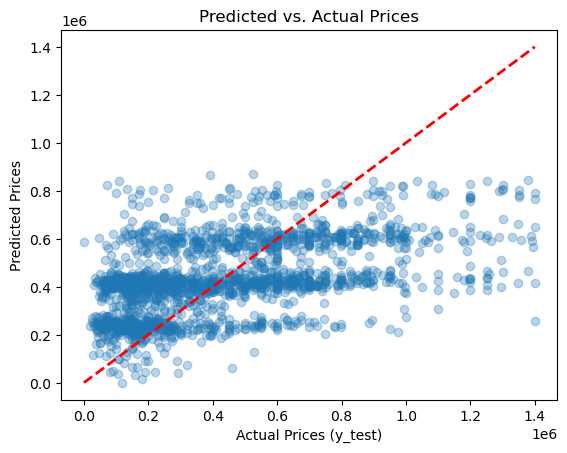

In [33]:
y_predicted = lasso_model.predict(X_test)

plt.scatter(y_test, y_predicted, alpha=.3)
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.show()

Here is a graph that shows each value plotted on the graph, comparing their actual values, and the values that our model predicted. If the data point is above the red line, then the model overpredicted the houses price, whereas if it is below the line, then the model undervalued the houses price. We will examine these results in greater depth in the next section.

The last thing we are going to do as part of our analysis is calculate the Residual Standard Error of our model. This will tell us the average magnitude of error in our residuals.

In [34]:
y_predicted = lasso_model.predict(X_test)
residuals = y_test - y_predicted

# Calculate RSE
n = len(residuals)  # Number of observations
p = X_test.shape[1]  # Number of predictors
rse = np.sqrt(np.sum(residuals**2) / (n - p - 1))

print(f"Residual Standard Error (RSE): {rse}")

Residual Standard Error (RSE): 263950.871265311


In the context of predicting house prices, the Residual Standard Error (RSE) of $$263,950.87 means that, on average, our model's predictions have an error of approximately $263,950.87 in terms of house prices.

## Part VI. Data Summary and Implications

### E. Summary of Implications

Here we will evaluate the overall effectiveness of our model. We have briefly discussed the results above, but here we will restate and then summarize the combined effort of our metrics.

In [35]:
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          4.15e-116
Time:                        10:17:52   Log-Likelihood:                -27797.
No. Observations:                2000   AIC:                         5.560e+04
Df Residuals:                    1995   BIC:                         5.563e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.464e+04   2.57e+04      2.905      0.0

Here again is the stats summary for our test model. The two metrics we are concerned with the most are the R-squared value and the F-statistic. We'll take a deeper dive into those scores.

<b>F-statistic:</b> A measure of the overall significance of the regression model. It tests the hypothesis that all coefficients in the model are equal to zero versus the alternative that at least one coefficient is not zero.

F-statistic Value (155.8): This value indicates the ratio of the mean square of the regression to the mean square of the residuals. In our case, an F-statistic of 155.8 suggests that the overall model is statistically significant.

Prob (F-statistic) (4.15e-116): The extremely low p-value associated with the F-statistic indicates that the likelihood of obtaining such a high F-statistic by random chance is very low. Therefore, we can reject the null hypothesis and conclude that the model is significant.

Implications:
A significant F-statistic suggests that at least one predictor variable in the model has a non-zero coefficient, and the model as a whole explains a significant amount of variability in the dependent variable.

<b>R-squared:</b> measures the proportion of the variance in the dependent variable explained by the independent variables in the model.

R-squared (0.238): This value tells us that approximately 23.8% of the variance in house prices is explained by the predictor variables in the model.

Adj. R-squared (0.236): The adjusted R-squared adjusts the R-squared value for the number of predictors. For us, the closeness of R-squared and adjusted R-squared suggests that the additional predictors are not providing substantial improvement.

Implications:
The R-squared value provides insight into the goodness of fit. In our case, R-squared of 0.238 suggests that the model explains a moderate portion of the variability in house prices.

In summary, a significant F-statistic and a meaningful R-squared indicate that your model has explanatory power and is statistically significant, however, it could be better at accounting for variance in the data. (Frost, 2022)

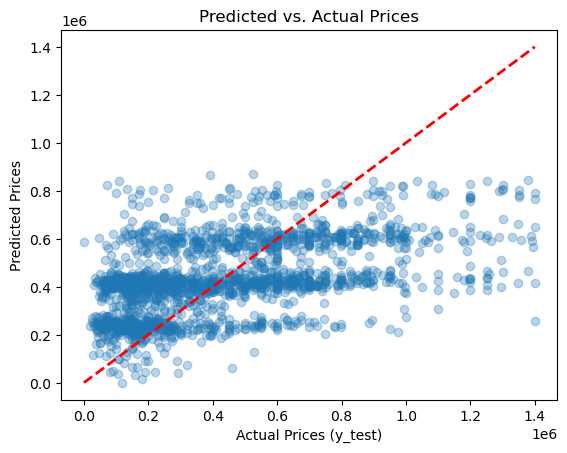

In [36]:
plt.scatter(y_test, y_predicted, alpha=.3)
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.show()

As we take another look at our graph, there are a few key takeaways. The first being that it doesn't appear that our model is all that good at predicting a houses price. As mentioned above, the closer to the red line the point is, the closer to accurate the prediction was. As we see, we have a majority of our clusters above the line, indicating that our model overpredicted the price on these homes. We also have a handful of homes that are actually above the $800,000 mark, which are model severely underpriced. Seeing such a spread on our graph indicates that the predictive power of our model is very weak. 

In [37]:
print(f"Residual Standard Error (RSE): {rse}")

Residual Standard Error (RSE): 263950.871265311


In [38]:
average_y_test = np.mean(y_test)
print(f"Average value of y_test: {average_y_test}")

Average value of y_test: 419064.424


Our RSE value of 263,950.87 means that on average, our model's price prediction for a home was off by 263,950.87 dollars. Always take that value in the context of the data. Our average home price for our test values was 419,064 dollars. Being off by 293,950 dollars in this context is obviously bad. That's a 63 percent difference in price.

### Hypothesis Results

Now as we consider all of the factors we mentioned above, we can make the conclusion that our model is not able to accurately predict a house's price. However, given our extremely high F-statistic coupled with its near-zero p-value, we can conclude that the model is statistically significant. These are two separate aspects used to measure a model's effectiveness. So, although our model is not practically useful for predictions, we can refute our null hypothesis, and accept our alternative hypothesis, that the number of bedrooms, bathrooms, square footage, and lot size has a statistically significant effect on housing prices in New York.

What this means in practical terms is that our four variables do have a significant influence on a house's price, which is in line with our original hypothesis. However, the model's inability to predict price and explain variance is likely because there are outside features that also have a significant influence on price. So just our four variables are not enough to build an effective model. The largest outside factor that is beyond the scope of our analysis is the city where the houses are. Put more generally, if the area is more urban or rural will have a large effect on its price. Houses in large urban cities, of which New York has many, are usually extremely expensive, especially when compared to houses in more rural areas in the state. This will have a disproportionate effect on our model, because a house in New York City itself could be a tiny 1 bed 1 bath home, and cost upwards of a million dollars, whereas a massive 4 bed 5 bath home upstate could only cost $600,000. This would explain the results of our model.

<b>Limitation of the Model</b>

The largest limitation that our model faces is the omission of important variables that could significantly affect housing prices. While we cover four important factors of a home's price, we do miss potential key information, such as the quality of the home, year it was built, if it has been recently updated, location of the home, and other factors that have an influence on the outside housing market. Because we lack the information with the data we had, we aren't able to fully conclude anything other than that our four variables have significance to price. (The Advantages and Disadvantages of a Multiple Regression Model, 2019)

<b>Recommended Course of Action</b>

Given the reality of our model, it is hard to recommend anything concrete other than to refine the model's performance. We did determine that our variables are statistically significant. So to the interested parties for whom this analysis was done for, there is a piece of information for you. Number of bedrooms, bathrooms, square footage, and number of acres have a direct effect on a house's price. But, you need more information before you can predict the house's price. The course of action that is then recommended would be to get more information or refine the search to a smaller area.

<b>Two Directions for Future Study</b>

The two directions that this analysis could go are collecting more information, or narrowing down the area that we are analyzing. If you want to build a model that can better predict a house's price, and you want this model to be able to do this for any area of the country/world, then collecting more information is a necessary step. Collect information such as the year built, if the house was recently renovated, other features the house has, and other facts about the house and the area in which it is located. More information will ensure that the model will perform better, and will also tell you which variables are or are not statistically significant to price. To apply this study to outside markets, having more information will only help allow your model to better handle that unseen data.

The other direction to go is to narrow down the area of analysis. For our study, we did New York, which is a massive state with different types of areas. Either narrow the study down based on a certain variable, like houses that have exactly 3 bedrooms, or based on the zip code or a specific city. Narrowing it down regionally will eliminate most of the outside factors that affect home prices, and leave you with an area that already has many similarities. In our case, a model that only looked at homes in the city of Brooklyn would likely produce a model effective at predicting a home's price. Narrowing down the study to reduce outside noise is a surefire way to increase model efficiency, and it also allows the analyst control over what factors they want to observe most, and what factors they want to avoid.

### F. Sources

Lasso - Team, C. (2023, November 21). LASSO. Corporate Finance Institute. https://corporatefinanceinstitute.com/resources/data-science/lasso/#:~:text=LASSO%2C%20short%20for%20Least%20Absolute,by%20Statistics%20Professor%20Robert%20Tibshirani.

E - Frost, J. (2022, July 22). How to interpret the F-test of overall significance in regression analysis. Statistics by Jim. https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/

E - The Advantages & Disadvantages of a Multiple Regression Model. (2019, March 2). Sciencing. https://sciencing.com/advantages-disadvantages-multiple-regression-model-12070171.html

Code - All of the code was taken from previous projects that I have created for this program